## Impact Of Building A Deeper Neural Network

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
from torch.optim import Adam
device='cuda' if torch.cuda.is_available() else 'cpu'
fmnist=datasets.FashionMNIST(r'../data',download=True,train=True)
tr_images=fmnist.data
tr_targets=fmnist.targets
val_fmnist=datasets.FashionMNIST(r'../data',download=True,train=False)
val_images=val_fmnist.data
val_targets=val_fmnist.targets

In [2]:
class FMNISTDataset(Dataset):
    def __init__(self,x,y):
        x=x.float().view(-1,28*28)/255
        self.x,self.y=x,y
    def __getitem__(self, item):
        return self.x[item].to(device),self.y[item].to(device)
    def __len__(self):
        return len(self.x)

def get_model():
    model=nn.Sequential(
        nn.Linear(28*28,10)
    ).to(device)
    loss_fn=nn.CrossEntropyLoss()
    optimizer=Adam(model.parameters(),lr=1e-3)
    return model,loss_fn,optimizer

def train_batch(x,y,model,opt,loss_fn):
    model.train()
    batch_loss=loss_fn(model(x),y)
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()

def accuracy(x,y,model):
    model.eval()
    with torch.no_grad():
        prediction=model(x)
    max_values,argmaxed=prediction.max(-1)
    is_correct=argmaxed==y
    return is_correct.cpu().numpy().tolist()

def get_data():
    train=FMNISTDataset(tr_images,tr_targets)
    trn_dl=DataLoader(train,batch_size=32,shuffle=True)
    val=FMNISTDataset(val_images,val_targets)
    val_dl=DataLoader(val,batch_size=len(val_images),shuffle=False)
    return trn_dl,val_dl

@torch.no_grad()
def val_loss(x,y,model,loss_fn):
    val_loss=loss_fn(model(x),y)
    return val_loss.item()

In [3]:
trn_dl,val_dl=get_data()
model,loss_fn,optimizer=get_model()

In [4]:
train_losses,train_accuracies=[],[]
val_losses,val_accuracies=[],[]
for epoch in range(5):
    print(epoch)
    train_epoch_losses,train_epoch_accuracies=[],[]
    for ix,batch in enumerate(iter(trn_dl)):
        x,y=batch
        batch_loss=train_batch(x,y,model,optimizer,loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss=np.array(train_epoch_losses).mean()
    for ix,batch in enumerate(iter(trn_dl)):
        x,y=batch
        is_correct=accuracy(x,y,model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy=np.mean(train_epoch_accuracies)
    for ix,batch in enumerate(iter(val_dl)):
        x,y=batch
        val_is_correct=accuracy(x,y,model)
        validation_loss=val_loss(x, y, model, loss_fn)
    val_epoch_accuracy=np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


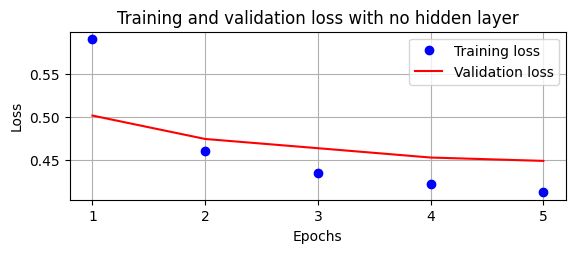

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12268\27491378.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x*100:.0f}%' for x in plt.gca().get_yticks()])


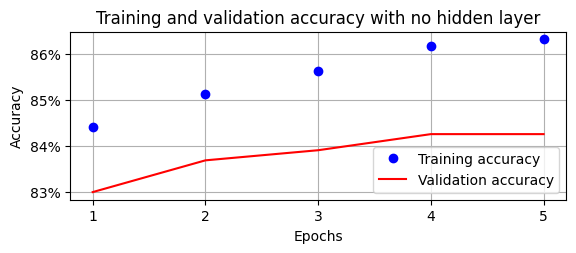

In [5]:
epochs = np.arange(5)+1
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with no hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with no hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels([f'{x*100:.0f}%' for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [6]:
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

In [7]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [8]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model,loss_fn)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


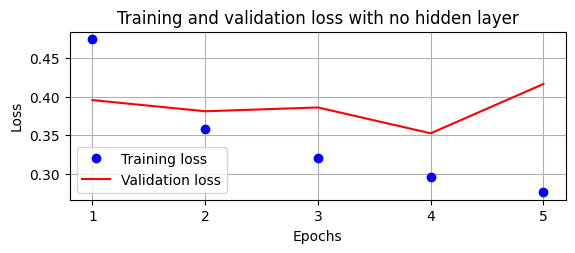

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12268\27491378.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x*100:.0f}%' for x in plt.gca().get_yticks()])


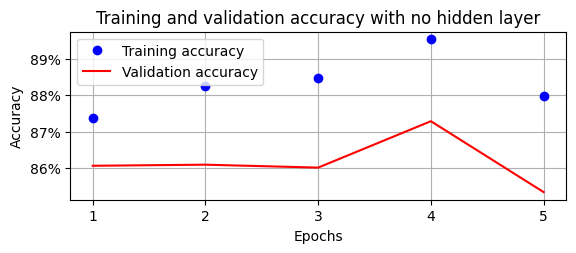

In [9]:
epochs = np.arange(5)+1
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with no hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with no hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels([f'{x*100:.0f}%' for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [10]:
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

In [11]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [12]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model,loss_fn)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


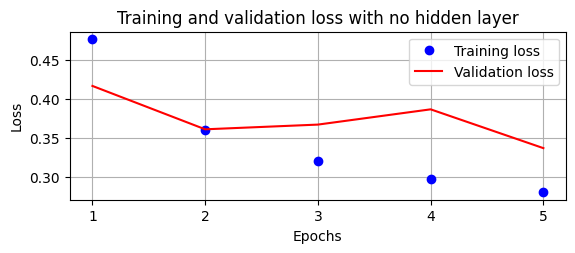

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12268\27491378.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x*100:.0f}%' for x in plt.gca().get_yticks()])


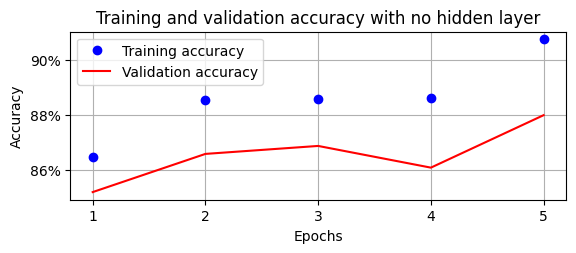

In [13]:
epochs = np.arange(5)+1
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with no hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with no hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels([f'{x*100:.0f}%' for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()